In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import sys
sys.path.append("../")
import utils as ut

In [3]:
egmap_dir = "/data5/deepro/starrseq/main_library/8_enhancer_gene_map/data/diff_peak/"
peak_dir = "/data5/deepro/starrseq/main_library/5_enhancer_classification/data/diff_activity/"
rnaseq_dir = "/data5/deepro/starrseq/main_library/7_rnaseq/data/de/diff_exp_to_control/"


libs = ["ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2"]

# t-test logFC and % of DE genes

In [4]:
data_dict = {
    "library": [],
    "peak_type": [],
    "percent_de_genes": [],
    "logfc_significance": []
}

In [5]:
for lib_short in libs:
    for peak_type in ["induced", "repressed", "constitutive"]:
        egmap_df = ut.get_egmap_df(ut.get_egmap_file(egmap_dir, lib_short, "great", peak_type))
        rnaseq_df = ut.get_rnaseq_df(ut.get_rnaseq_file(rnaseq_dir, lib_short))
        percent_de, test_pval = ut.get_t_stats_and_percent_de_genes(rnaseq_df, egmap_df)
        data_dict["library"].append(lib_short)
        data_dict["peak_type"].append(peak_type)
        data_dict["percent_de_genes"].append(percent_de)
        data_dict["logfc_significance"].append(test_pval)

In [6]:
meta_df = pd.DataFrame(data_dict)

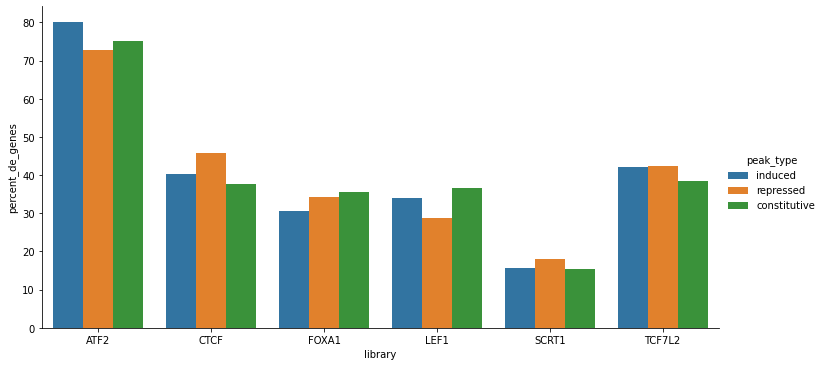

In [7]:
sns.catplot(data=meta_df, x="library", y="percent_de_genes", hue="peak_type", kind="bar", aspect=2)

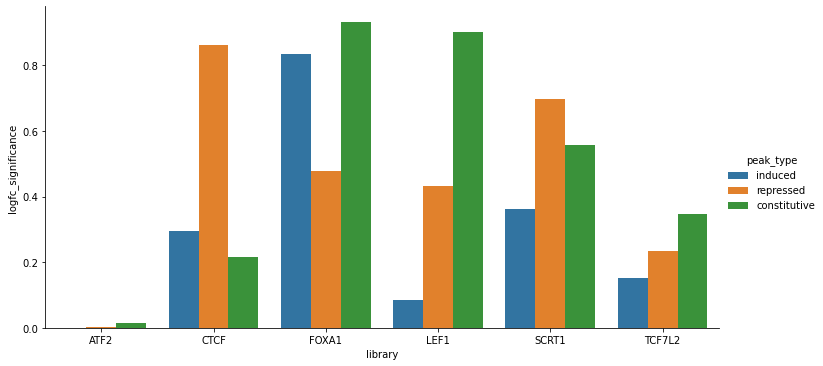

In [8]:
sns.catplot(data=meta_df, x="library", y="logfc_significance", hue="peak_type", kind="bar", aspect=2)

In [9]:
meta_df

,library,peak_type,percent_de_genes,logfc_significance
0,ATF2,induced,80.165289,2.606909e-10
1,ATF2,repressed,72.831050,3.874225e-03
2,ATF2,constitutive,75.000000,1.404355e-02
3,CTCF,induced,40.293040,2.956781e-01
4,CTCF,repressed,45.701357,8.623781e-01
5,CTCF,constitutive,37.757437,2.157669e-01
6,FOXA1,induced,30.463576,8.341129e-01
7,FOXA1,repressed,34.302326,4.771483e-01
8,FOXA1,constitutive,35.520362,9.331432e-01
9,LEF1,induced,34.065934,8.447076e-02
